In [21]:
from collections import Counter

with open("../data/Fingerprint/Fingerprint_graph_labels.txt") as f:
    labels = list(map(int, f.readlines()))

with open("../data/Fingerprint/Fingerprint_graph_indicator.txt") as f:
    indicators = list(map(lambda x: int(x) - 1, f.readlines()))

with open("../data/Fingerprint/Fingerprint_A.txt") as f:
    edges = list(map(lambda x: (int(x.split(",")[0]) - 1, int(x.split(",")[1]) - 1), f.readlines()))

with open("../data/Fingerprint/Fingerprint_node_attributes.txt") as f:
    node_attrs = list(map(lambda x: (float(x.split(",")[0]), float(x.split(",")[1])), f.readlines()))

with open("../data/Fingerprint/Fingerprint_edge_attributes.txt") as f:
    edge_attrs = list(map(lambda x: (float(x.split(",")[0]), float(x.split(",")[1])), f.readlines()))

In [65]:
import networkx as nx
import numpy as np

def plot_graph(G, **kwargs):
    options = {
        "node_size": 50,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 2,
    }
    options.update(kwargs)
    
    pos = {node: np.array([G.nodes[node]['x'], G.nodes[node]['y']]) for node in G.nodes}
    nx.draw(G, pos, **options, nodelist=G.nodes)

In [23]:
graphs = [nx.Graph() for i in range(len(labels))]

for i, ((x, y), g) in enumerate(zip(node_attrs, indicators)):
    graphs[g].add_node(i, x=x, y=y)

for i, ((orient, angle), (n1, n2)) in enumerate(zip(edge_attrs, edges)):
    g1, g2 = indicators[n1], indicators[n2]
    assert g1 == g2

    graphs[g1].add_edge(n1, n2, orient=orient, angle=angle)

In [52]:
graphs[3].nodes

NodeView(())

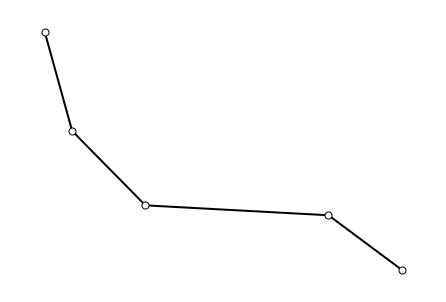

In [66]:
plot_graph(graphs[920])